REEF DAMAGE REACTION ANALYSIS
	
Analyzing bleaching records globally from 1963 to 2012 to identify when events have happened that damage coral reefs and attempt to correlate the resultant response in the media and by individuals using available data sources. 

Research Questions to Answer:

- How has public response to Reef damage changed over time?
- Has reef damage and public response affected policy?
- What is the correlation of ocean warming and coral damage? 
- How do coral damages events correlate to public response by tweets and news portals?
- What does the map of public response look like in relation to where damage occurs globally?


Data Sources Used:



In [6]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib 
from bubbly.bubbly import bubbleplot

# to imbed plots, prevents pop-ups windows for plots
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [7]:
# Read CSV and store reef information into Pandas Data Frames-- low memory required to suppress errors about mixed data types
reef_loc_df = pd.read_csv('ReefLocations.csv', encoding='iso-8859-1', low_memory=False)
coral_bleach_df = pd.read_csv('CoralBleaching.csv', encoding='iso-8859-1', low_memory=False)
#mon_site_df = pd.read_csv('MonitoringSites.csv', encoding='iso-8859-1', low_memory=False)

In [8]:
# Percentage of Severity Code 
# –1: Unknown (bleaching observed, but no indication of severity)
# 0: No Bleaching (confirmed no bleaching observed at location)
# 1: Low (1-10% of corals bleached)
# 2: Medium (~10-30% of corals bleached)
# 3: High (>30% of corals bleached)

bleach_tot = coral_bleach_df.count()[10]# Display the total number of reef type
severity_total = coral_bleach_df["SEVERITY_CODE"].value_counts()
severity_percents = severity_total / bleach_tot * 100
severity_type_summary = pd.DataFrame({"Total Count by Severity Code": severity_total, "Percentage of Severity Type": severity_percents})

# Minor Data Munging
severity_type_summary = severity_type_summary.round(2)
severity_type_summary.index.name = "Severity Code"
severity_type_summary['Severity Code Description'] = {"No Bleaching (confirmed no bleaching observed at location)", "Low (1-10% of corals bleached)",
                                         "Unknown (bleaching observed, but no indication of severity)",
                                         "High (>30% of corals bleached)", "Medium (~10-30% of corals bleached)"} 

# Sort the table by ascending order
severity_sorted = severity_type_summary.sort_values("Percentage of Severity Type", ascending=False)

# Rearrangingorganize columns order
severity_sorted = severity_sorted[["Severity Code Description", "Total Count by Severity Code", "Percentage of Severity Type"]]

# Display summary table of the severity code description, count and percentage of severity observed
severity_sorted

,Severity Code Description,Total Count by Severity Code,Percentage of Severity Type
Severity Code,,,
0,No Bleaching (confirmed no bleaching observed ...,1477,23.86
1,Medium (~10-30% of corals bleached),1429,23.09
-1,Low (1-10% of corals bleached),1201,19.40
3,"Unknown (bleaching observed, but no indication...",1172,18.93
2,High (>30% of corals bleached),911,14.72


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A168366358>,
      dtype=object)

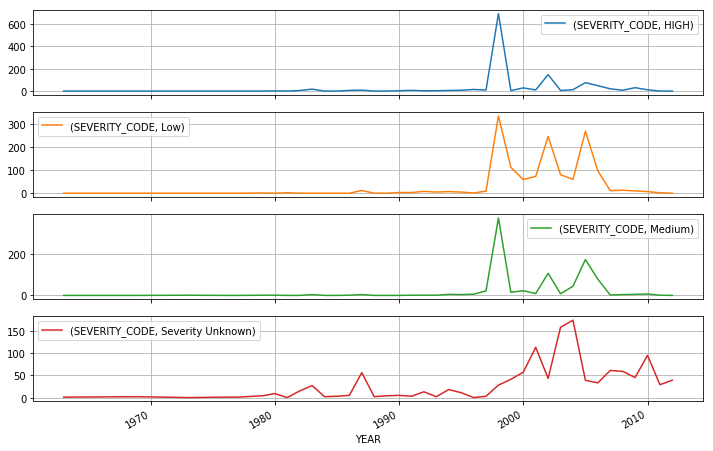

In [9]:
# Visualization of Bleaching occurence by severity code over time

year_grouped = coral_bleach_df.groupby(["YEAR", "BLEACHING_SEVERITY"]).count()["SEVERITY_CODE"]

grouped_df = pd.DataFrame(year_grouped)

#Fill the NAN where no incidence was reported by zero
grouped_unstack = grouped_df.unstack().fillna(0)

# Drop the no bleaching columns as we are just looking at situation of bleaching
grouped_unstack_drop = grouped_unstack.drop("No Bleaching", axis=1, level=1)

# Plot incidence of coral bleaching per year based on severity code
grouped_unstack_drop.plot(subplots=True, grid=True)

In [17]:
# Extracting data per region
region_df = coral_bleach_df[['REGION', 'YEAR', "BLEACHING_SEVERITY"]]
region_df["REGION"] = region_df["REGION"].fillna(value="TBD")
region_df["REGION"].unique()

C:\Users\dbik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array(['TBD', 'Africa', 'Americas', 'Asia', 'Australia', 'Middle East',
       'Pacific'], dtype=object)

In [33]:
# Obtain the x and y coordinates for each of the region 
americas_df = region_df[region_df["REGION"] == "Americas"]
australia_df = region_df[region_df["REGION"] == "Australia"]
pacific_df = region_df[region_df["REGION"] == "Pacific"]



In [29]:
# Build the scatter plots for each region 
plt.scatter(americas_count, americas_c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")


TypeError: scatter() missing 1 required positional argument: 'y'

In [27]:
americas_df


,REGION,YEAR,BLEACHING_SEVERITY
225,Americas,1986,Medium
226,Americas,1998,Medium
227,Americas,2005,Severity Unknown
228,Americas,2005,Severity Unknown
229,Americas,2010,No Bleaching
230,Americas,2010,Severity Unknown
231,Americas,1998,HIGH
232,Americas,1999,HIGH
233,Americas,1998,HIGH
234,Americas,2007,Low
